# 🚀 NetworkX Workshop
## Session 3
### 🌹 Special thanks to Mr. Yahya Hematyar Tabatabaei, whose insightful NetworkX workshop inspired and guided the creation of this notebook

# 🧠 Welcome to the NetworkX Workshop!

This notebook is read-only.

👉 To work on it, click `File → Save a copy in Drive`.  
This will create your own editable version in Google Drive.

Happy coding! 🚀

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tabatabaeiphys/NetworkX/blob/main/netx3.ipynb)





This tutorial will cover:
- Connected graph
- Graph components
- Connectivity in directed graph
- NetworkX Networks
- Network robustness


## Import libraries

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


### Connected Graph 

A connected graph is a graph in which there is a path between every pair of vertices. In the example below, you can see that every node is reachable from any other node, meaning the graph is fully connected.



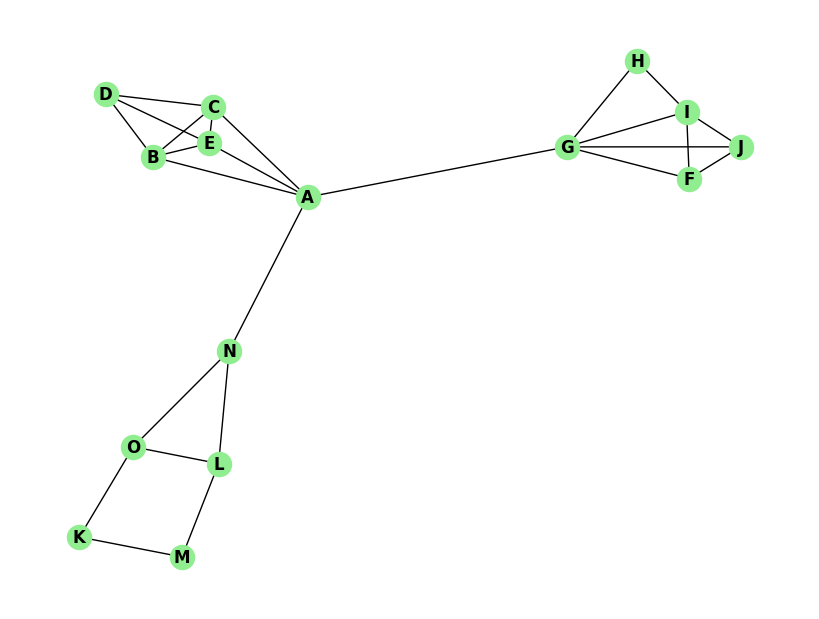

In [24]:

G = nx.Graph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'),  \
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'), 
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G,seed=50)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', font_weight='bold',  font_size=12, edge_color='black')
plt.show()


In [25]:
nx.is_connected(G)

True

### Graph component
The number of components tells us how many separate subgraphs exist in the graph.

let's see how we can find the components in this graph.




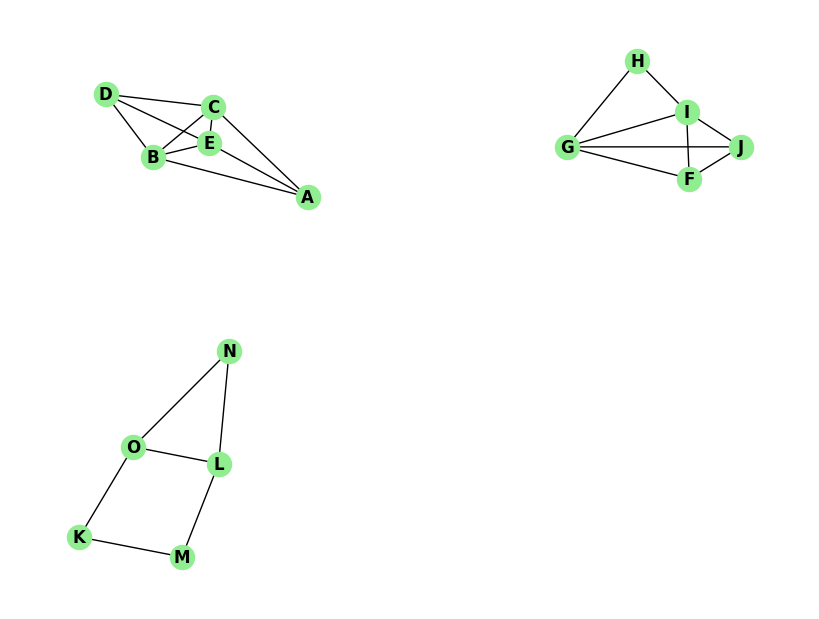

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), # Removed ('A', 'G') and ('A', 'N')
    ('B', 'C'), ('B', 'E'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'),
    ('F', 'J'), ('F', 'I'), ('I', 'J'), ('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'), ('O', 'L')
]

G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
full_G = nx.Graph()
full_edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'),
    ('B', 'C'), ('B', 'E'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'),
    ('F', 'J'), ('F', 'I'), ('I', 'J'), ('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'), ('O', 'L')
]
full_G.add_edges_from(full_edges)

pos = nx.spring_layout(full_G, seed=50)

nx.draw(G, pos, with_labels=True, node_color='lightgreen', font_weight='bold', font_size=12, edge_color='black')
plt.savefig('component_modified.png')
plt.show()

In [27]:
nx.number_connected_components(G)


3

In [28]:
sorted(nx.connected_components(G))


[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [29]:
nx.node_connected_component(G,'M')

{'K', 'L', 'M', 'N', 'O'}

### Giant Component

In [30]:
components = list(nx.connected_components(G))

giant_cc_nodes = max(components, key=len)
G_giant = G.subgraph(giant_cc_nodes).copy()
print(f"Giant component has {G_giant.number_of_nodes()} nodes ({len(giant_cc_nodes) / G.number_of_nodes():.1%} of the graph)")


Giant component has 5 nodes (33.3% of the graph)


## clique
A clique is a set of nodes all mutually connected. It’s the graph-theory analogue of ‘everyone knows everyone else.’

In [31]:
import networkx as nx

G = nx.karate_club_graph()

cliques = list(nx.find_cliques(G))
sizes = [len(c) for c in cliques]
max_size = max(sizes)

print(f"Total maximal cliques: {len(cliques)}")
print(f"Largest clique size: {max_size}")
largest = [c for c in cliques if len(c)==max_size]
print("Largest cliques:", largest)


Total maximal cliques: 36
Largest clique size: 5
Largest cliques: [[0, 1, 2, 3, 13], [0, 1, 2, 3, 7]]


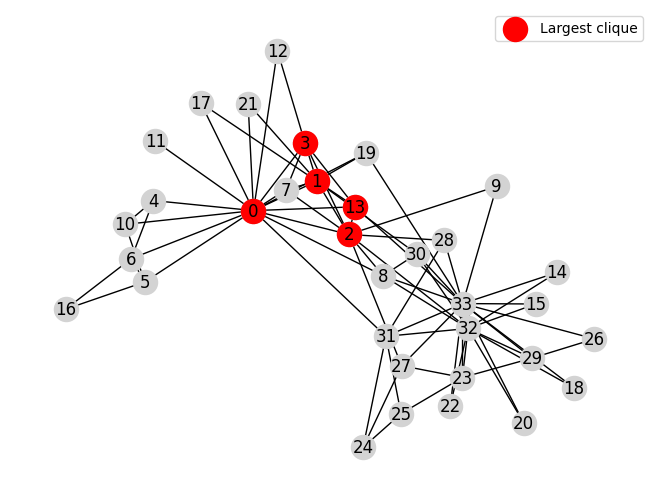

In [32]:

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lightgray', with_labels=True)

clique = largest[0]
nx.draw_networkx_nodes(G, pos,
                       nodelist=clique,
                       node_color='red',
                       label="Largest clique")
plt.legend(scatterpoints=1)
plt.show()


### Directed Graph Connectivity


1. **Weakly Connected Components**:
    - A directed graph is weakly connected if replacing all directed edges with undirected edges results in a connected graph.
    - This means that there may not be directed paths between nodes, but if the directions are ignored, all nodes are still reachable from each other.
    - In essence, weak connectivity only cares if the nodes are connected, but not about the direction of the connections.



2. **Strongly Connected Components**:
    - A directed graph is strongly connected if, for every pair of nodes **u**  and  **v** , there is a directed path from  **u**  to  **v**  and also a directed path from **v** to  **u** .
    - Strongly connected components (SCCs) are maximal subgraphs where each vertex is reachable from every other vertex by following directed edges.
    - In other words, within each strongly connected component, all nodes can reach each other while respecting the direction of the edges.



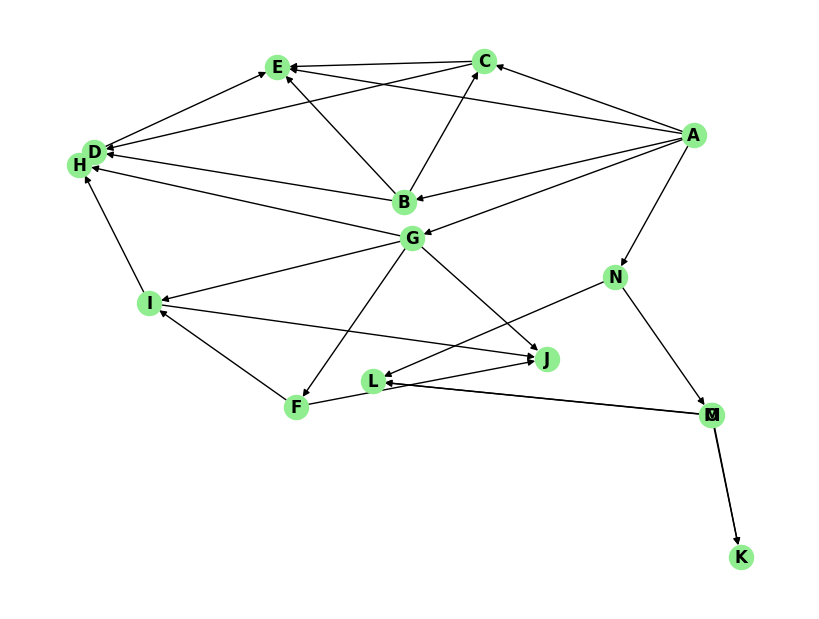

In [33]:
DG = nx.DiGraph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'), 
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

DG.add_edges_from(edges)
plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(DG) 
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', font_weight='bold',  font_size=12, edge_color='black')
plt.savefig('DG.png')
plt.show()



In [34]:
nx.is_strongly_connected(DG)

False

In [35]:
nx.is_weakly_connected(DG)

True

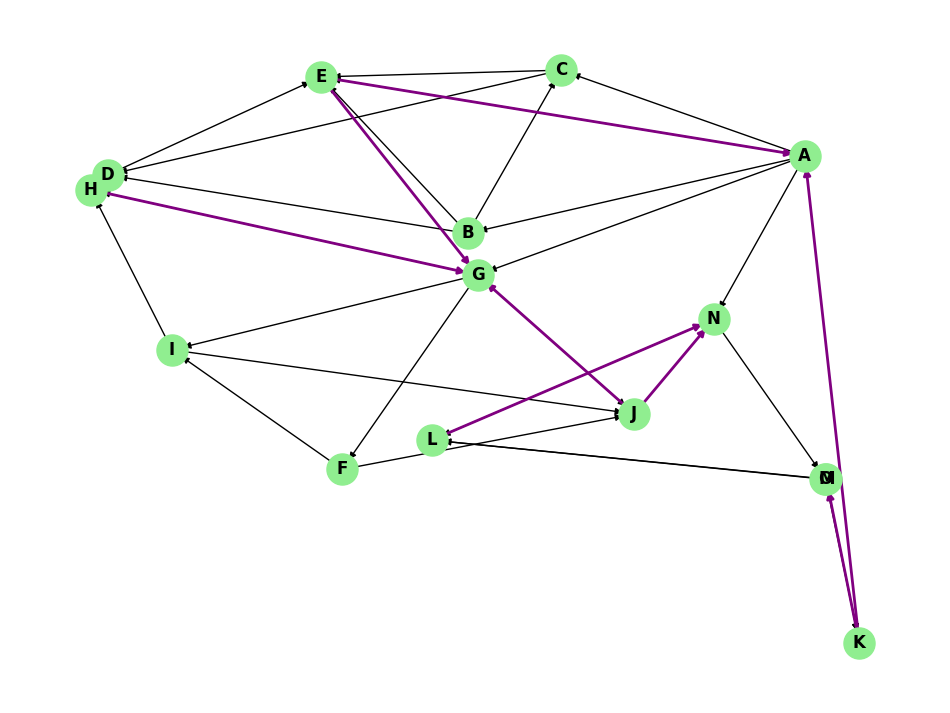

In [36]:
DG = nx.DiGraph()

edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'G'), ('A', 'N'), 
    ('B', 'C'), ('B', 'E'),('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('G', 'F'), ('G', 'H'), ('G', 'I'), ('G', 'J'), 
    ('F', 'J'),('F', 'I'),  ('I', 'J'),('I', 'H'),
    ('N', 'L'), ('N', 'O'),
    ('M', 'L'), ('M', 'K'), ('O', 'K'),('O', 'L')
]

new_edges = [
    ('E', 'A'), 
    ('J', 'G'),
    ('H', 'G'), 
    ('K', 'M'),  
    ('L', 'N'),  
    ('E', 'G'),  
    ('J', 'N'),  
    ('K', 'A')   
]

DG.add_edges_from(edges)
DGS = nx.DiGraph()
DGS.add_edges_from(edges)
DGS.add_edges_from(new_edges)


pos = nx.kamada_kawai_layout(DG)

plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(DGS, pos, node_color='lightgreen', node_size=500)
nx.draw_networkx_labels(DGS, pos, font_weight='bold', font_size=12)

original_edges = [e for e in DGS.edges() if e in edges]
added_edges = [e for e in DGS.edges() if e in new_edges]

nx.draw_networkx_edges(DGS, pos, edgelist=original_edges, edge_color='black', arrows=True)
nx.draw_networkx_edges(DGS, pos, edgelist=added_edges, edge_color='purple', arrows=True, width=2)

plt.axis('off')
plt.show()

In [37]:
print("Is the graph strongly connected now?", nx.is_strongly_connected(DGS))


Is the graph strongly connected now? True


In [38]:
nx.is_weakly_connected(DGS)

True

### NetworkX Networks


In [39]:
def network_metrics(G):
    avg_clustering = nx.average_clustering(G)
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        avg_shortest_path = np.inf 
    return avg_clustering, avg_shortest_path

def draw_network(G, title):
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)  
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, edge_color='gray')
    plt.title(title)
    plt.show()


### NetworkX Networks


<h3>
    <span style="color:#00FF00">G</span>
    <span style="color:#FF7F00">o</span>
    <span style="color:#FFFF00">o</span>
    <span style="color:#FF0000">g</span>
    <span style="color:#0000FF">l</span>
    <span style="color:#8B00FF">e</span> it: NetworkX Graph Generators
</h3>

[https://networkx.org/documentation/stable/reference/generators.html](https://networkx.org/documentation/stable/reference/generators.html)


### Network Examples


## 1. **Random Network (Erdős-Rényi Model)**
The Erdős-Rényi random graph is generated by connecting nodes randomly. Each pair of nodes is connected with a probability `p`.

**Parameters:**
- `n`: Number of nodes.
- `p`: Probability for edge creation.

**Use Case:**
- Useful for modeling random processes such as rumor spreading or social network formation where there’s no bias in connecting nodes.

![Random Network](random_network.png)

Average Clustering = 0.2936,  Average Shortest Path = 1.9586



## 2. **Small-World Network (Watts-Strogatz Model)**
This network starts as a ring lattice and rewires some edges randomly. It retains the local clustering of lattice graphs and has the short average path lengths of random graphs.

**Parameters:**
- `n`: Number of nodes.
- `k`: Each node is joined with its `k` nearest neighbors in a ring topology.
- `p`: Probability of rewiring each edge.

**Use Case:**
- Used to model social networks and neural networks, where there’s high clustering and short path lengths between any two nodes.

![smallworld Network](small_world.png)

 Average Clustering = 0.3778,  Average Shortest Path = 3.0920


## 3. **Barabási-Albert Network (Scale-Free Network)**
This is a scale-free network where nodes are added one at a time, and each new node is connected to existing nodes with a probability that is proportional to the number of links that the existing nodes already have.

**Parameters:**
- `n`: Number of nodes.
- `m`: Number of edges to attach from a new node to existing nodes.

**Use Case:**
- Used to model networks like the Internet or citation networks, where some nodes (hubs) have a much higher degree than others.

![barabasi Network](barabasi.png)

 Average Clustering = 0.2509,  Average Shortest Path = 2.0690

## 4. **Random Regular Network**
A random regular graph is a graph where each node has the same number of neighbors (`degree`), and the neighbors are chosen randomly.

**Parameters:**
- `n`: Number of nodes.
- `d`: Degree of each node (the number of neighbors).

**Use Case:**
- Useful for modeling systems with uniform interaction degrees, such as some physical and biological systems.

![rregular Network](rregular.png)

 Average Clustering = 0.0333,  Average Shortest Path = 3.2598


## 5. **Grid Network**
A regular grid network has nodes arranged in a grid (usually 2D or 3D). Each node is connected to its nearest neighbors.

**Parameters:**
- `m`: Number of rows.
- `n`: Number of columns.

**Use Case:**
- Common in physical systems modeling, such as fluid dynamics or cellular automata.

![grid Network](grid.png)

 Average Clustering = 0.0000,  Average Shortest Path = 2.0000

# Network Robustness

Network robustness refers to the resilience of a network to failures or attacks. Robustness measures how well a network maintains its overall structure and functionality when nodes or edges are removed. The following concepts are critical in analyzing the robustness of a network:


## Simple Paths

In graph theory, a **simple path** is a path that does not repeat any nodes. A path is simply a sequence of edges that connect a series of nodes. In a simple path:
- Each node is visited exactly once (no cycles).
- The start and end nodes can be different or the same (if the path returns to the starting node, it's called a **cycle**).

Simple paths are crucial in understanding how information, resources, or people travel through a network. They also help in solving problems like finding the shortest route between two nodes or determining if two nodes are connected.


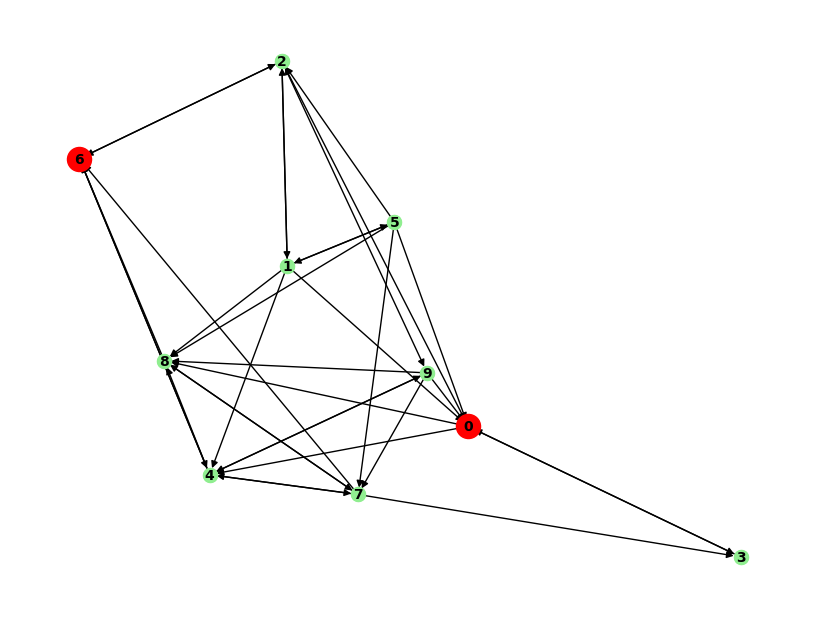

In [40]:

n = 10
p = 0.3  
G = nx.erdos_renyi_graph(n, p, directed=True,seed=42)  

pos = nx.spring_layout(G,seed=50)  

plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=100, font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=100)

source_node = 0
target_node = 6
nx.draw_networkx_nodes(G, pos, nodelist=[source_node, target_node], node_color='red')  

plt.show()



In [41]:
simple_paths = list(nx.all_simple_paths(G, source=source_node, target=target_node))
print(f"All simple paths from {source_node} to {target_node}: {simple_paths}")


All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0, 8, 7, 4, 6], [0, 8, 7, 6]]


### Disconnecting a graph

what is the smallest number of nodes that can be removed from below graph in order to make it dissconnected?


1. **Node Connectivity**:
    - The minimum number of nodes that must be removed to disconnect the remaining network.
    - High node connectivity indicates greater resilience to node failures.





Minimum node cut between 0 and 6: {8, 2, 4}
All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0, 8, 7, 4, 6], [0, 8, 7, 6]]


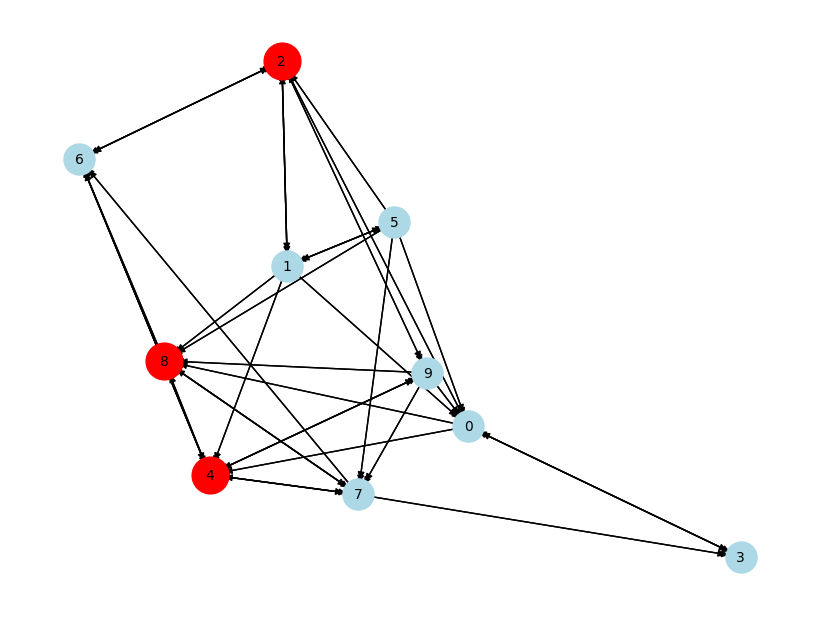

In [42]:
n = 10
p = 0.3 
G = nx.erdos_renyi_graph(n, p, seed=42, directed=True)

source = 0
target = 6

min_node_cut = nx.minimum_node_cut(G, source, target)
print(f"Minimum node cut between {source} and {target}: {min_node_cut}")

all_paths = list(nx.all_simple_paths(G, source=source, target=target))
print(f"All simple paths from {source} to {target}: {all_paths}")

pos = nx.spring_layout(G,seed=50)
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

nx.draw_networkx_nodes(G, pos, nodelist=min_node_cut, node_color='red', node_size=700)

plt.savefig('NC1.png')

plt.show()




what is the smallest number of *edges* that can be removed from below graph in order to make it dissconnected?

2. **Edge Connectivity**:
    - The minimum number of edges that must be removed to disconnect the network.
    - High edge connectivity indicates resilience to link (or edge) failures.



In a robust network, node or edge failures will have minimal impact on the overall connectivity of the network.


Minimum node cut between 0 and 6: {8, 2, 4}
Minimum edge cut between 0 and 6: {(0, 2), (0, 4), (0, 8)}
All simple paths from 0 to 6: [[0, 2, 1, 4, 6], [0, 2, 1, 4, 7, 6], [0, 2, 1, 4, 7, 8, 6], [0, 2, 1, 4, 8, 6], [0, 2, 1, 4, 8, 7, 6], [0, 2, 1, 4, 9, 7, 6], [0, 2, 1, 4, 9, 7, 8, 6], [0, 2, 1, 4, 9, 8, 6], [0, 2, 1, 4, 9, 8, 7, 6], [0, 2, 1, 5, 7, 4, 6], [0, 2, 1, 5, 7, 4, 8, 6], [0, 2, 1, 5, 7, 4, 9, 8, 6], [0, 2, 1, 5, 7, 6], [0, 2, 1, 5, 7, 8, 6], [0, 2, 1, 5, 8, 6], [0, 2, 1, 5, 8, 7, 4, 6], [0, 2, 1, 5, 8, 7, 6], [0, 2, 1, 8, 6], [0, 2, 1, 8, 7, 4, 6], [0, 2, 1, 8, 7, 6], [0, 2, 6], [0, 2, 9, 4, 6], [0, 2, 9, 4, 7, 6], [0, 2, 9, 4, 7, 8, 6], [0, 2, 9, 4, 8, 6], [0, 2, 9, 4, 8, 7, 6], [0, 2, 9, 7, 4, 6], [0, 2, 9, 7, 4, 8, 6], [0, 2, 9, 7, 6], [0, 2, 9, 7, 8, 6], [0, 2, 9, 8, 6], [0, 2, 9, 8, 7, 4, 6], [0, 2, 9, 8, 7, 6], [0, 4, 6], [0, 4, 7, 6], [0, 4, 7, 8, 6], [0, 4, 8, 6], [0, 4, 8, 7, 6], [0, 4, 9, 7, 6], [0, 4, 9, 7, 8, 6], [0, 4, 9, 8, 6], [0, 4, 9, 8, 7, 6], [0, 8, 6], [0,

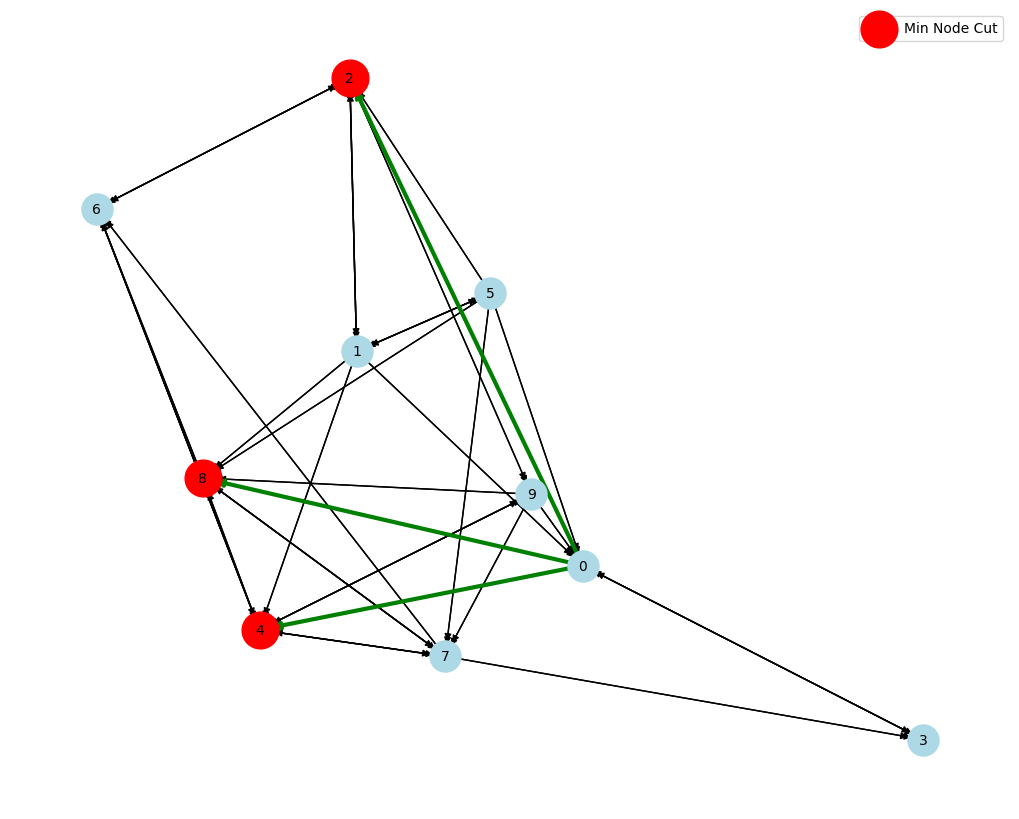

In [43]:
n = 10
p = 0.3 
G = nx.erdos_renyi_graph(n, p, seed=42, directed=True)

source = 0
target = 6

min_node_cut = nx.minimum_node_cut(G, source, target)
print(f"Minimum node cut between {source} and {target}: {min_node_cut}")

min_edge_cut = nx.minimum_edge_cut(G, source, target)
print(f"Minimum edge cut between {source} and {target}: {min_edge_cut}")

all_paths = list(nx.all_simple_paths(G, source=source, target=target))
print(f"All simple paths from {source} to {target}: {all_paths}")

pos = nx.spring_layout(G,seed=50)
plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

nx.draw_networkx_nodes(G, pos, nodelist=min_node_cut, node_color='red', node_size=700, label="Min Node Cut")

nx.draw_networkx_edges(G, pos, edgelist=min_edge_cut, edge_color='green', width=3, label="Min Edge Cut")

plt.legend(loc="upper right")
plt.savefig('EC1.png')

plt.show()


### Thank you for your attention!
